In [1]:
!pip install xmltodict

In [42]:
import os
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime


In [43]:
data_folder = "data/KZT"
all_data = []
#loading in all the data from data file from quest 1

In [44]:
#this was from ai 
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [45]:
for filename in os.listdir(data_folder):
    if filename.endswith(".json"):
        file_path = os.path.join(data_folder, filename)
        try:
            with open(file_path, "r", encoding = "utf-8") as f:
                data = json.load(f)
                date = filename.replace(".json", "")
                items = data["channel"]["item"]
                for entry in items:
                    all_data.append({
                        "date": date,
                        "base": entry["baseCurrency"],
                        "target": entry["targetCurrency"],
                        "rate": float(entry["exchangeRate"])
                    })
        except Exception as e:
            print(f"Error reading {filename}: {e}")

In [46]:
df = pd.DataFrame(all_data)
df["date"] = pd.to_datetime(df["date"])
df.sort_values("date", inplace = True)
df.head()

,date,base,target,rate
0,2011-05-04,KZT,EUR,0.004609
29,2011-05-04,KZT,PLN,0.018165
30,2011-05-04,KZT,QAR,0.024967
31,2011-05-04,KZT,RUB,0.187414
32,2011-05-04,KZT,SAR,0.025722


In [47]:
major_currencies = ["USD", "EUR", "GBP", "JPY", "CNY"]
df_major = df[df["target"].isin(major_currencies)]

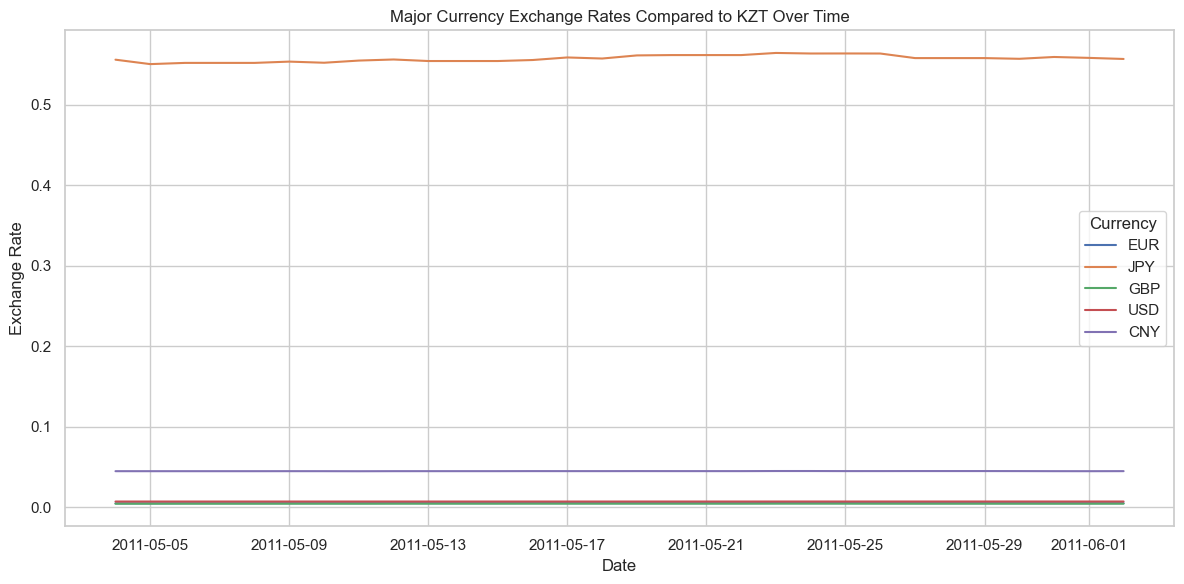

In [48]:
sns.lineplot(data=df_major, x = "date", y = "rate", hue = "target")
plt.title("Major Currency Exchange Rates Compared to KZT Over Time")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.legend(title = "Currency")
plt.tight_layout()
plt.show()

C:\Users\19512\AppData\Local\Temp\ipykernel_11428\1913454805.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_major["rolling_std"] = df_major.groupby("target")["rate"].transform(lambda x: x.rolling(window = 30).std())


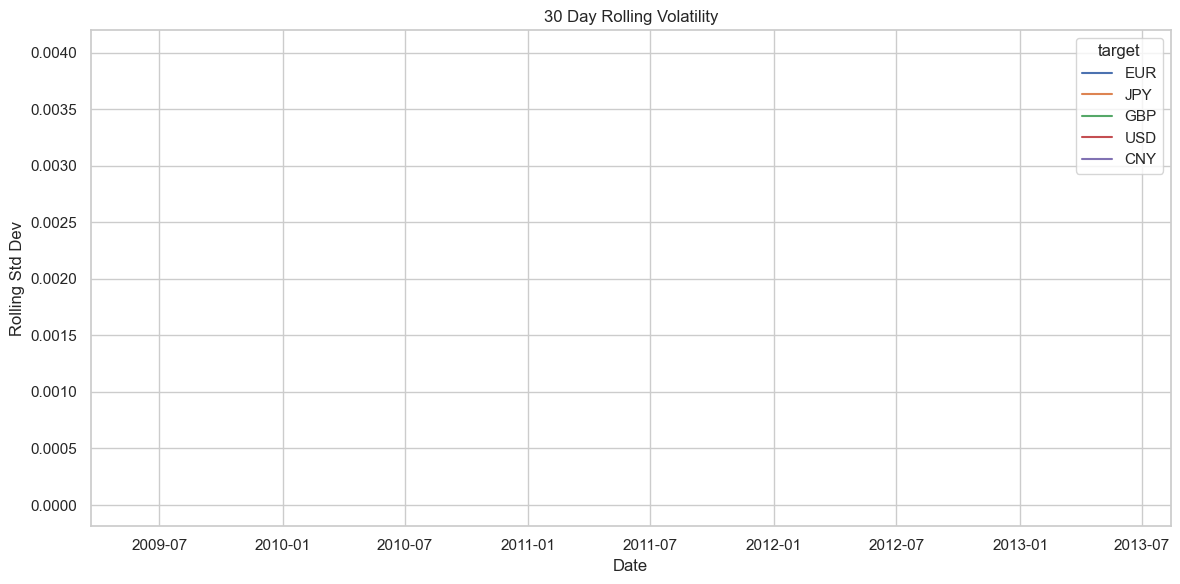

In [49]:
df_major["rolling_std"] = df_major.groupby("target")["rate"].transform(lambda x: x.rolling(window = 30).std())
sns.lineplot(data = df_major, x = "date", y = "rolling_std", hue = "target")
plt.title("30 Day Rolling Volatility")
plt.xlabel("Date")
plt.ylabel("Rolling Std Dev")
plt.tight_layout()
plt.show()

In [ ]:
#all_data = load_data(base_currency)
#all_data["date"] = pd.to_datetime(all_data["date"])
#columns_to_keep = ["date"] + major_targets
#filtered_data = all_data[columns_to_keep]
#filtered_data["date"] = pd.to_datetime(filtered_data["date"])

Error parsing 2011-05-04.json: 'date'
Error parsing 2011-05-05.json: 'date'
Error parsing 2011-05-06.json: 'date'
Error parsing 2011-05-07.json: 'date'
Error parsing 2011-05-08.json: 'date'
Error parsing 2011-05-09.json: 'date'
Error parsing 2011-05-10.json: 'date'
Error parsing 2011-05-11.json: 'date'
Error parsing 2011-05-12.json: 'date'
Error parsing 2011-05-13.json: 'date'
Error parsing 2011-05-14.json: 'date'
Error parsing 2011-05-15.json: 'date'
Error parsing 2011-05-16.json: 'date'
Error parsing 2011-05-17.json: 'date'
Error parsing 2011-05-18.json: 'date'
Error parsing 2011-05-19.json: 'date'
Error parsing 2011-05-20.json: 'date'
Error parsing 2011-05-21.json: 'date'
Error parsing 2011-05-22.json: 'date'
Error parsing 2011-05-23.json: 'date'
Error parsing 2011-05-24.json: 'date'
Error parsing 2011-05-25.json: 'date'
Error parsing 2011-05-26.json: 'date'
Error parsing 2011-05-27.json: 'date'
Error parsing 2011-05-28.json: 'date'
Error parsing 2011-05-29.json: 'date'
Error parsin

KeyError: 'date'

In [ ]:
#time_series_df = filtered_data.pivot(index="date", columns = "targetCurrency", value = "exchangeRate")

NameError: name 'filtered_data' is not defined